# Sprint4課題 機械学習スクラッチロジスティック回帰

## 【問題1】ロジスティック回帰のクラスを作成する
ロジスティック回帰のクラスを作成し、Sprint2で作成した分類のパイプラインに組み込んでください。

クラスの基本構造はSprint3の線形回帰を参考にし、名前はScratchLogisticRegressionとしてください。

メソッドやパラメータなどはscikit-learnを参考にしてください。推定関係ではラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

シグモイド関数
コーディング

シグモイド関数を実装しましょう。

正しく動作しているかを確認するために、この関数に-10から10の値を入力したときの出力をプロットしておいてください。

目的関数
以下の数式で表されるロジスティック回帰の目的関数Jを実装してください。この数式には正則化項が含まれています。

数式が見切れる場合、DIVERを全画面にして御覧ください

最急降下法
最急降下法により学習させてください。バイアス項およびj番目のパラメータの更新には以下の式を使います。

In [ ]:
#まずはイメージを固める

In [6]:
#特徴量X (n_samples, n_features)
#x_0: intercept, x_1: first feature, x_2: second feature)
import numpy as np
X = np.array([
    [1, 1, 2],
    [1, 3, 4],
    [1, 5, 6],
    [1, 7, 8],
    [1, 9, 10]
])
X

array([[ 1,  1,  2],
       [ 1,  3,  4],
       [ 1,  5,  6],
       [ 1,  7,  8],
       [ 1,  9, 10]])

In [18]:
#目的変数y(n_samples)
y = np.array([0, 1, 1, 0, 1]).reshape(-1, 1)
y

array([[0],
       [1],
       [1],
       [0],
       [1]])

In [75]:
#Xの係数theta(n_features)
theta = np.empty((0,3))
theta = np.append(theta, np.array([[0,0,0]]), axis=0)
theta

array([[0., 0., 0.]])

In [76]:
#sigmoid function

def convert_sigmoid(z):
    """
    Parameters
    -----------
    z: ndarray of shape(any, any)
    
    Returns
    -----------
    sigmoid_z: ndarray of shape z
        sigmoid_z = 1/(1 + exp(-z))
    
    Note
    -----------
    """
    sigmoid_z = 1/(1 +np.exp(-z))
    
    
    return sigmoid_z

In [77]:
#シグモイドの確認
convert_sigmoid(y)

array([[0.5       ],
       [0.73105858],
       [0.73105858],
       [0.5       ],
       [0.73105858]])

In [78]:
test = np.arange(-10, 10, 0.1)
test.shape

(200,)

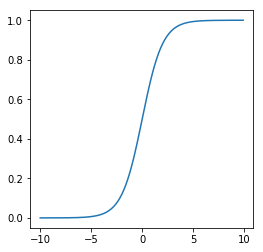

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.plot(test, convert_sigmoid(test), '-')

In [80]:
#Hypothesis function
#thetaとxから求めたyの予測値
h = convert_sigmoid(np.dot(X, theta.reshape(-1, 1)))
h

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]])

In [81]:
#Cost functionを順を追って計算
#np.logの確認
np.log(h)

array([[-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718],
       [-0.69314718]])

In [82]:
# y = 1の時に h ≒ 0と予測するとコスト無限大になり、h ≒ 1と予測するとコスト最小となる項
-y*np.log(h)

array([[-0.        ],
       [ 0.69314718],
       [ 0.69314718],
       [-0.        ],
       [ 0.69314718]])

In [83]:
# y = 0の時に h ≒ 1と予測するとコスト無限大になり、h ≒ 0と予測するとコスト最小となる項
(1-y)*np.log(1-h)

array([[-0.69314718],
       [-0.        ],
       [-0.        ],
       [-0.69314718],
       [-0.        ]])

In [84]:
#正則化項の確認

lmd = 1
lmd*(theta[:, 1:]**2).sum(axis=1)

array([0.])

In [85]:
#Cost関数Jの確認
J = (-y*np.log(h) -(1-y)*np.log(1-h)).sum(axis=0)/len(X) + lmd*(theta[:, 1:]**2).sum(axis=1)/len(X)
J

array([0.69314718])

In [89]:
#sumの計算を内積にする
#出力が一致したのでOK
J = (-np.dot(y.T, np.log(h)) -np.dot((1-y).T, np.log(1-h)))/len(X) + lmd*np.dot(theta[:,1:], theta[:, 1:].T)/len(X)
J

array([], shape=(0, 0), dtype=float64)

In [ ]:
#イメージできたのでクラスを作る

In [255]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchLogisticRegression():
    """
    Logistic回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr: float
        学習率learning rate
    lmbd: float
        正則化パラメータ lambda
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, lmbd, bias=1, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.lmbd = lmbd
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        #XにX_0の列をbias埋めで追加（切片の項を追加）
        X = np.concatenate((np.full((len(X), 1), self.bias), X), axis=1)
                
        # yのshapeを(n_samples, )から(n_samples, 1)にする
        y = y.reshape(-1,1)
        
        #validation dataに対して同様の前処理
        if not ((X_val is None) or (y_val is None)):
            X_val = np.concatenate((np.full((len(X_val), 1), self.bias), X_val), axis=1)
            y_val = y_val.reshape(-1,1)
        
        #coef_ (theta)を初期化 (1, n_features)
        #-1 ~ 1の乱数で
        a = -1
        b = 1
        self.coef_ = (b - a) * np.random.rand(X.shape[1]).reshape(1,-1)  + a     
        
        #self.iterの回数だけself.coef_を更新しながらhも更新していく
        for i in range(self.iter):
            #予測値h
            h = self._hypothesis(X)
            
            #hを元にしてCostの計算
            mse, error = self._cost(h, y)
            
            #costをval_lossに記録
            self.loss[i] = mse
            
            #validation dataに対して同様の処理
            if not ((X_val is None) or (y_val is None)):
                h_val = self._hypothesis(X_val)
                J_val, error_val = self._cost(h_val, y_val)
                self.val_loss[i] = J_val
                
            #errorを元にgradを計算してself.coef_を更新
            self._gradient_descent(X, error)
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)
            print(self.val_loss)
    def predict_proba(self, X_test):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        #XにX_0の列を追加（切片の項を追加）
        X_test = np.concatenate((np.full((len(X_test), 1), self.bias), X_test), axis=1)
        
        #a.dot(b)よりもnp.dot(a, b)の方が早い(np.dotはC言語、a.dotはPythonでの処理なので)
        prob = self._convert_sigmoid(np.dot(X_test, (self.coef_).T))
        return prob
    
    def predict(self, X_test):
        pred = (self.predict_proba(X_test) >= 0.5) + 0
        pred = pred.reshape(1, -1)
        
        return pred

    def _convert_sigmoid(self, z):
        """
        Parameters
        -----------
        z: ndarray of shape(any, any)

        Returns
        -----------
        sigmoid_z: ndarray of shape z
            sigmoid_z = 1/(1 + exp(-z))

        Note
        -----------
        """
        sigmoid_z = 1/(1 +np.exp(-z))
        return sigmoid_z
    
    def _hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
          学習データ

        Returns
        -------
          ndarray of shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        h = self._convert_sigmoid(np.dot(X, (self.coef_).T))
        
        return h
      
    def _cost(self, h, y):
        """
        costの計算

        Parameters
        ----------
        h : ndarray of shape (n_samples,)
          推定した値
        y : ndarray of shape (n_samples,)
          正解値

        Returns
        ----------
        J : np.float
        """
        
        #コストのメイン部分
        #(1/m) * sigma(-y*log(h(x)) - (1-y)*log(1-h(x)))
        J = (-np.dot(y.T, np.log(h)) -np.dot((1-y).T, np.log(1-h)))/len(X)
        
        #正則化項
        #(lambda/m)* sigma(theta^2)
        #theta = 0は除外して足し合わせる
        reg_term =  self.lmbd*np.dot(self.coef_, self.coef_.T)/len(X)
        
        #コスト（メイン + 正則化項）
        J = J + reg_term
        
        #誤差(Jの勾配の計算用に)
        error = h - y
        
        return J, error

    def _gradient_descent(self, X, error):
        """
        Parameters
        ----------
        X: ndarray of shape (n_samples, n_features)
          学習データ

        error: y_pred - y
           予測値と実際のyの差
        Returns
        ----------
        インスタンス変数のtheta (self.coef_)を更新

        """
        #grad = (error * X).sum(axis=0)/len(X)
        #上の計算と同義。早い方で
        
        #theta = 0の場合
        grad_0 = np.dot(error.T, X[:, 0])/len(X)
        self.coef_[:, 0] =  self.coef_[:, 0] - self.lr * grad_0
        
        #theta = 1の場合
        grad_j =  np.dot(error.T, X[:, 1:])/len(X) - self.lmbd*self.coef_[:, 1:]/len(X)
        self.coef_[:, 1:] =  self.coef_[:, 1:] - self.lr * grad_j

    #学習曲線Plot用の関数
    def plot_learning_curve(self):
        fig, ax = plt.subplots(1,1, figsize=(4,4 ))
        ax.plot(np.array(range(self.iter)), self.loss, "-", label = 'train')
        ax.plot(np.array(range(self.iter)), self.val_loss, "-", label = 'validation')

        #label
        ax.set_title('Learning Curve')
        ax.set_xlabel('n of iterations')
        ax.set_ylabel('Cost')
        ax.legend()

# 1, 2を0, 1に変えるのも必要

In [256]:
from sklearn.datasets import load_iris
dataset = load_iris()
print(dataset.keys())
print(dataset.target_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']


In [257]:
import pandas as pd

#import features
x = pd.DataFrame(dataset.data, columns = dataset.feature_names)
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [258]:
#import target value
y = pd.DataFrame(dataset.target, columns = {'species'})
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [259]:
#concatenate x and y
df = pd.concat((x, y), axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [260]:
#extract only setosa and versicolor
#drop virginica rows(label: 2)
drop_row = df[df['species'] == 2].index
df = df.drop(drop_row, axis=0)

In [261]:
#dropできた
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


In [263]:
#Splitして標準化する
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'species'].values, df.loc[:, df.columns == 'species'].values, train_size=3/4, test_size=1/4)

#standardize
scaler = StandardScaler()
scaler.fit(X_train)
X_train_z = scaler.transform(X_train)
X_test_z = scaler.transform(X_test)

In [270]:
#スクラッチした線形回帰クラスのインスタンスを生成
reg = ScratchLogisticRegression(num_iter=500, lr=0.01, lmbd = 1,  bias=1, verbose=True)

In [271]:
#fit with train data
reg.fit(X_train_z, y_train, X_test_z, y_test)
#reg.fit(X_train_z, y_train)

[8.66141999 8.57956763 8.49895206 8.41955234 8.34134783 8.2643182
 8.18844342 8.11370373 8.0400797  7.96755219 7.89610234 7.8257116
 7.75636173 7.68803475 7.620713   7.5543791  7.48901596 7.42460678
 7.36113502 7.29858446 7.23693912 7.17618333 7.11630167 7.05727898
 6.99910041 6.94175132 6.88521737 6.82948445 6.77453872 6.72036659
 6.66695471 6.61428996 6.56235949 6.51115066 6.46065107 6.41084856
 6.36173116 6.31328717 6.26550508 6.21837359 6.17188162 6.12601829
 6.08077294 6.03613509 5.99209448 5.94864101 5.90576479 5.86345613
 5.8217055  5.78050355 5.73984112 5.69970921 5.66009901 5.62100184
 5.58240923 5.54431284 5.50670449 5.46957616 5.43291997 5.39672822
 5.36099331 5.32570783 5.29086447 5.25645608 5.22247564 5.18891626
 5.15577117 5.12303376 5.09069749 5.058756   5.02720301 4.99603237
 4.96523805 4.93481412 4.90475476 4.87505428 4.84570707 4.81670763
 4.78805058 4.75973061 4.73174253 4.70408123 4.67674171 4.64971905
 4.62300843 4.5966051  4.57050441 4.5447018  4.51919278 4.493972

In [272]:
#predict test data
scrach_pred = reg.predict(X_test_z)
scrach_pred

array([[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0]])

In [273]:
y_test.reshape(1, -1)

array([[0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 0]])

In [274]:
scrach_pred ==y_test.reshape(1, -1)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True]])

## 【問題2】学習曲線のプロット
学習曲線をプロットしてください。

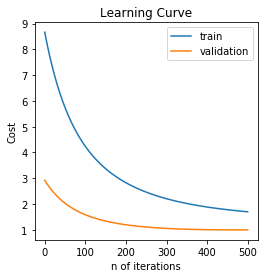

In [275]:
reg.plot_learning_curve()

## 【問題3】指標値の算出
分類に関する指標値で精度を確認してください。

## 【問題4】決定領域の可視化
2値分類のデータセットに対して決定領域を可視化してください。

## 【問題5】（アドバンス課題）重みの保存
検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやnumpy.savezを利用します。

pickle — Python オブジェクトの直列化 — Python 3.7.1 ドキュメント

numpy.savez — NumPy v1.15 Manual

## 【問題6】分類と回帰
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

分類問題と回帰問題は本質的に何が異なっているか
注意点

答えがある問いではありません。いろいろな視点から見て理解を深めていきましょう。